In [103]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import math

## SGD algorithm

In [104]:
def sgd(df, point, learn_rate = 0.1, epsilon=0.0001):
    delta = 1e9
    current_iteration = 0
    x_sequence = [point[0]]
    y_sequence = [point[1]]
    while delta > epsilon:
        if current_iteration % 2 == 0:
            weights = np.array([df["dx"](point[0]), 0])
        else:
            weights = np.array([0, df["dy"](point[1])])

        next_point = point - learn_rate * weights

        x_sequence = np.append(x_sequence, next_point[0])
        y_sequence = np.append(y_sequence, next_point[1])
        delta = math.sqrt((next_point[0] - point[0]) ** 2 + (next_point[1] - point[1]) ** 2)

        point = next_point
        current_iteration += 1
    return current_iteration, x_sequence,y_sequence

## ADAM algorithm

In [105]:
def adam(df, point, learn_rate = 0.1, threshold=0.0001, e = 0, beta1 = 0.9, beta2 = 0.9999999):
    delta = 1e9
    v_t = 0
    m_t = 0
    current_iteration = 1

    x_sequence = [point[0]]
    y_sequence = [point[1]]

    while delta > threshold:
        Gt = df["df"](point[0], point[1])
        m_t = beta1 * m_t + (1 - beta1) * Gt
        v_t = beta2 * v_t + (1 - beta2) * (Gt ** 2)
        m_t_ = m_t / (1 - beta1 ** current_iteration)
        v_t_ = v_t / (1 - beta2 ** current_iteration)

        next_point = point - learn_rate * m_t_ / (np.sqrt(v_t_)  + e)

        x_sequence = np.append(x_sequence, next_point[0])
        y_sequence = np.append(y_sequence, next_point[1])
        delta = math.sqrt((next_point[0] - point[0]) ** 2 + (next_point[1] - point[1]) ** 2)
        point = next_point
        current_iteration += 1


    return current_iteration, x_sequence, y_sequence

In [106]:
def draw_contour(x_list, y_list):
    border = 100
    x_points = [i / 10 for i in range(-border, border)]
    y_points = [i / 10 for i in range(-border, border)]
    z_points = []
    for x in x_points:
        z_= []
        for y in y_points:
            z = f(y, x)
            z_ = np.append(z_, z)
        z_points.append(z_)
    plt.contourf(x_points, y_points, z_points)
    plt.plot(x_list, y_list, color="red", label="path to function's minimun")
    plt.legend()
    plt.show()
    plt.clf()

def print_stat(output):
    x_, y_ = output[1][-1], output[2][-1]
    z_ = f(x_, y_)
    print('Minimum (x,y) from sgd: ({}, {})'.format(output[1][-1], output[2][-1]))
    print('Minimum of function is: {}'.format(z_))
    print('Number of algorithm iterations: {}'.format(output[0]))

#### function

##### Z = x * sin(x) + y * cos(y)
##### d/dx = sin(x) + x cos(x)
##### d/dy = cos(y) - y sin(y)

plz see about this function: [here](https://www.wolframalpha.com/input/?i=z%3Dx*sin%28x%29+%2B+y++*+cos%28y%29)


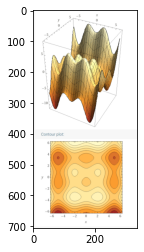

In [107]:
img = mpimg.imread('res/shoot_2.PNG')
imgplot = plt.imshow(img)
plt.show()

In [108]:
def f(x,y):
    return x*math.sin(x) + y * math.cos(y)

def df_dx(x):
    return math.sin(x) + x * math.cos(x)

def df_dy(y):
    return math.cos(y) - y * math.sin(y)

def plain_df(x,y):
    return np.array([df_dx(x), df_dy(y)])

df = {'df': plain_df, 'dx' : df_dx, 'dy': df_dy}

## SGD usage

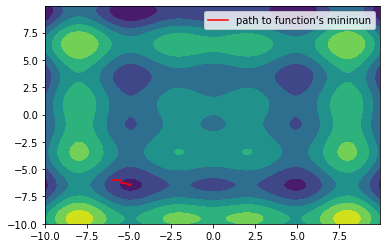

Minimum (x,y) from sgd: (-4.914484635732727, -6.437269354145145)
Minimum of function is: -11.17546939727727
Number of algorithm iterations: 18


<Figure size 432x288 with 0 Axes>

In [109]:
sgd_output = sgd(df, np.array([-6, -6]))
draw_contour(sgd_output[1],sgd_output[2])
print_stat(sgd_output)

## Adam usage

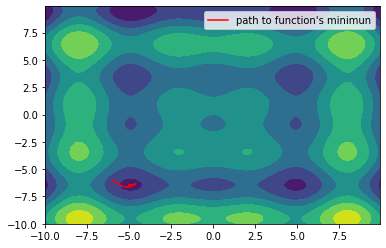

Minimum (x,y) from sgd: (-4.911707274674645, -6.437813159678087)
Minimum of function is: -11.175467294297595
Number of algorithm iterations: 126


<Figure size 432x288 with 0 Axes>

In [110]:
adam_output = adam(df, np.array([-6,-6]))
draw_contour(adam_output[1],adam_output[2])
print_stat(adam_output)